#2.1: Unsupervised Learning Algorithms

Objective:  Use two techniques — Dendrograms and Principal Components Analysis (PCA) — to analyse and better understand the weather station dataset.

### This script contains the following:

## 1. [Import Libraries](#import_libraries)

## 2. [Data Wrangling and Scaling](#wrangling)

## 3. [Dendrogram code](#dendrogram)

### 3.1 [Basel VS Budapest - 1960](#basel)

### 3.2 [All Stations - 1960](#all)

### 3.3 [Basel VS Budapest VS Heathrow - 1960](#3)

## 4. [Principal Components Analysis](#principal)

## 5. [Exporting PCA'd dataset to csv file](#save)



## 1. Importing Libraries  <a id='import_libraries'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
#create a path to the folder
path = r'/content/drive/MyDrive/Careerfoundary/Machine_learning'

In [3]:
#import the dataset
pleasant = pd.read_csv(os.path.join(path, '012 Data', 'Original_Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [4]:
pleasant.shape

(22950, 16)

In [5]:
pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
#import the dataset
unscaled = pd.read_csv(os.path.join(path, '012 Data', 'Original_Data', 'weather_dataset.csv'), index_col = False)

In [7]:
unscaled.shape

(22950, 170)

In [8]:
unscaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


## 2. Data Wrangling and Scaling <a id='wrangling'></a>

In [9]:
# Limit the dataset to 1960

In [10]:
#Reducing dataset to 1960
dfdecade = unscaled[unscaled['DATE'].astype(str).str.contains('1960')] #<-----INSERT YEAR HERE
dfdecade

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,19601227,12,8,2.1,0.98,1.018,0.18,0.55,0,0.0,...,6,0.77,0.9993,0.30,2.09,0,1.8,5.3,2.9,7.7
362,19601228,12,4,2.1,0.93,1.018,0.41,0.00,0,1.8,...,6,0.73,0.9954,0.19,0.60,0,0.3,5.7,2.5,8.9
363,19601229,12,7,2.1,0.89,1.018,0.37,0.01,0,1.3,...,6,0.86,1.0044,0.12,1.27,0,0.0,7.4,3.2,11.6
364,19601230,12,6,2.1,0.85,1.018,0.62,0.06,0,5.3,...,6,0.77,1.0026,0.34,1.14,0,2.3,6.6,4.8,8.9


In [11]:
# Scaling dfdecade for ML
scaler = StandardScaler()

In [12]:
sixties_scaled = pd.DataFrame(scaler.fit_transform(dfdecade))

In [13]:
sixties_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,-1.639546,-1.597591,0.570848,-4.440892e-16,0.623770,-2.220446e-16,-1.071460,-0.305217,-0.20878,-0.871676,...,-0.385140,0.788172,-0.848454,-0.864171,-0.183800,-0.052342,0.175924,-0.542397,-0.349356,-0.729979
1,-1.636649,-1.597591,0.133755,-4.440892e-16,0.535928,-2.220446e-16,-1.029711,1.989201,-0.20878,-0.775269,...,0.775034,1.197544,-0.814862,-1.077929,0.565484,-0.052342,-0.851000,-0.435710,-0.444617,-0.408923
2,-1.633753,-1.597591,1.007941,-4.440892e-16,1.062976,-2.220446e-16,-1.217584,0.196687,-0.20878,-1.040387,...,0.775034,1.197544,-0.067437,-1.163432,-0.573427,-0.052342,-1.005039,-0.008963,0.150765,-0.194885
3,-1.630857,-1.597591,-1.177524,-4.440892e-16,1.238659,-2.220446e-16,-0.800088,-0.520319,-0.20878,-0.052220,...,0.775034,0.515257,0.671590,-1.206183,0.775284,-0.052342,-1.030712,-0.835786,-0.039757,-0.810243
4,-1.627961,-1.597591,0.133755,-4.440892e-16,1.502183,-2.220446e-16,-0.727026,-0.185716,-0.20878,0.261101,...,-1.545314,-0.303487,1.880907,-0.853483,-0.693313,-0.052342,0.432655,-1.289205,-1.063815,-1.398846


In [14]:
sixties_scaled.shape

(366, 170)

In [15]:
# Copying columns headers from original temp dataset, pasting to scaled

columns=unscaled.columns.values.tolist() #create a list of column names for your df
columns #list the columns

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

In [16]:
sixties_scaled.columns = columns

In [17]:
sixties_scaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.639546,-1.597591,0.570848,-4.440892e-16,0.623770,-2.220446e-16,-1.071460,-0.305217,-0.20878,-0.871676,...,-0.385140,0.788172,-0.848454,-0.864171,-0.183800,-0.052342,0.175924,-0.542397,-0.349356,-0.729979
1,-1.636649,-1.597591,0.133755,-4.440892e-16,0.535928,-2.220446e-16,-1.029711,1.989201,-0.20878,-0.775269,...,0.775034,1.197544,-0.814862,-1.077929,0.565484,-0.052342,-0.851000,-0.435710,-0.444617,-0.408923
2,-1.633753,-1.597591,1.007941,-4.440892e-16,1.062976,-2.220446e-16,-1.217584,0.196687,-0.20878,-1.040387,...,0.775034,1.197544,-0.067437,-1.163432,-0.573427,-0.052342,-1.005039,-0.008963,0.150765,-0.194885
3,-1.630857,-1.597591,-1.177524,-4.440892e-16,1.238659,-2.220446e-16,-0.800088,-0.520319,-0.20878,-0.052220,...,0.775034,0.515257,0.671590,-1.206183,0.775284,-0.052342,-1.030712,-0.835786,-0.039757,-0.810243
4,-1.627961,-1.597591,0.133755,-4.440892e-16,1.502183,-2.220446e-16,-0.727026,-0.185716,-0.20878,0.261101,...,-1.545314,-0.303487,1.880907,-0.853483,-0.693313,-0.052342,0.432655,-1.289205,-1.063815,-1.398846


## 3. Dendrogram code <a id='dendrogram'></a>

# 3.1 Basel VS Budapest - 1960 <a id='basel'></a>

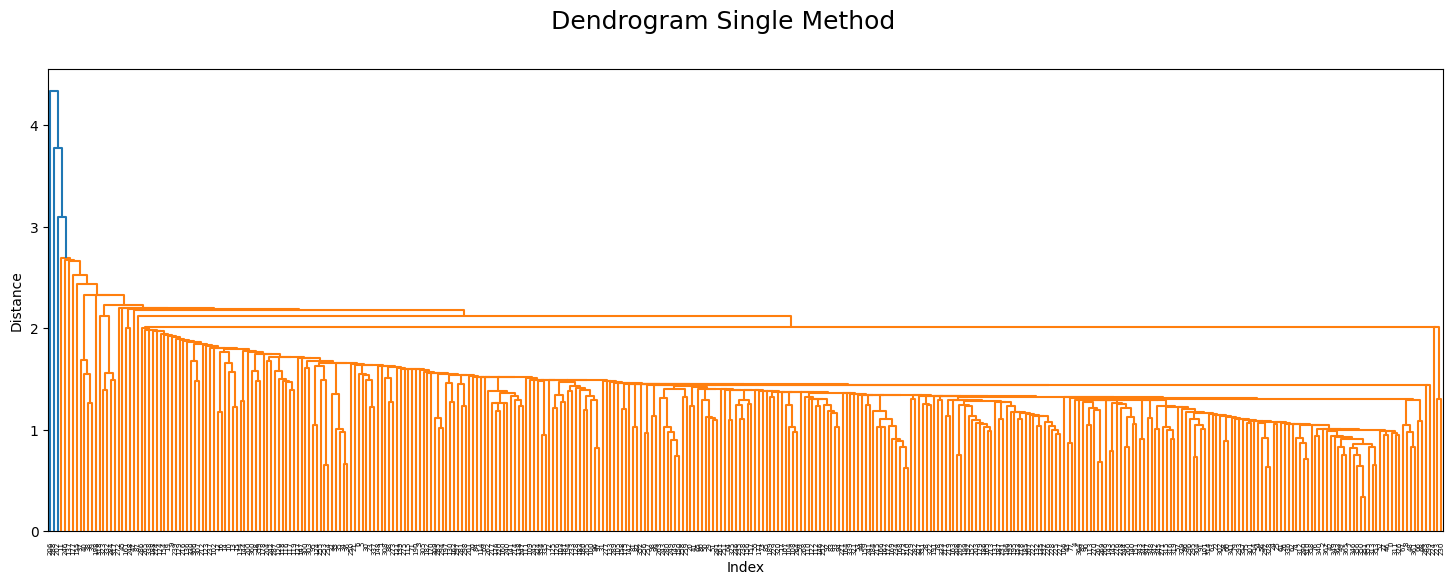

In [18]:
#Comparing only Basel and Budapest 1960 - single method

distance_single = linkage(sixties_scaled.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',]],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

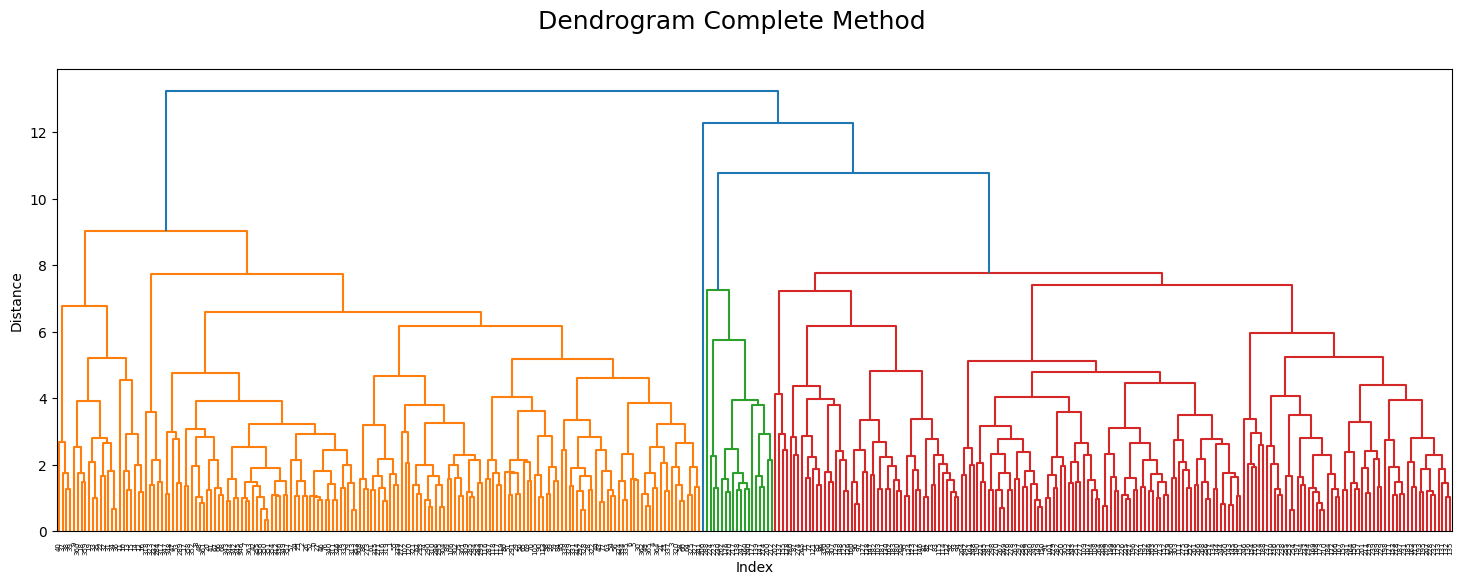

In [19]:
#Comparing only Basel and Budapest 1960 - complete method

distance_complete = linkage(sixties_scaled.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',]],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

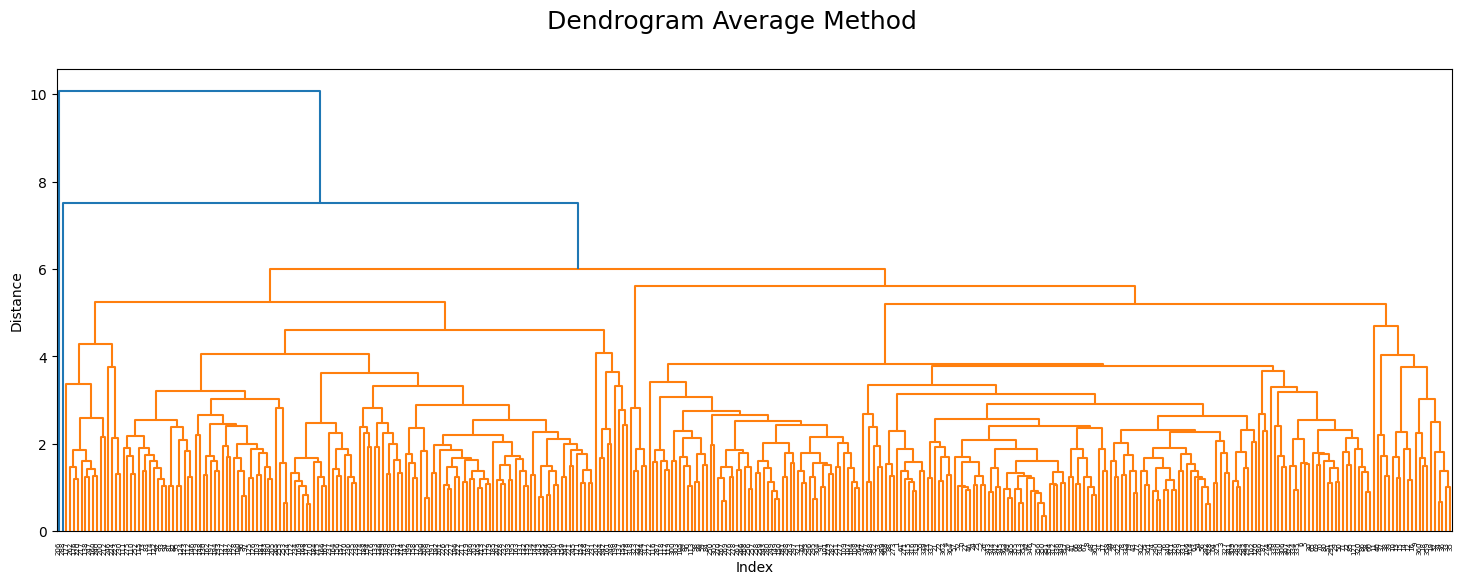

In [20]:
#Comparing only Basel and Budapest 1960 - average method

distance_average = linkage(sixties_scaled.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',]],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

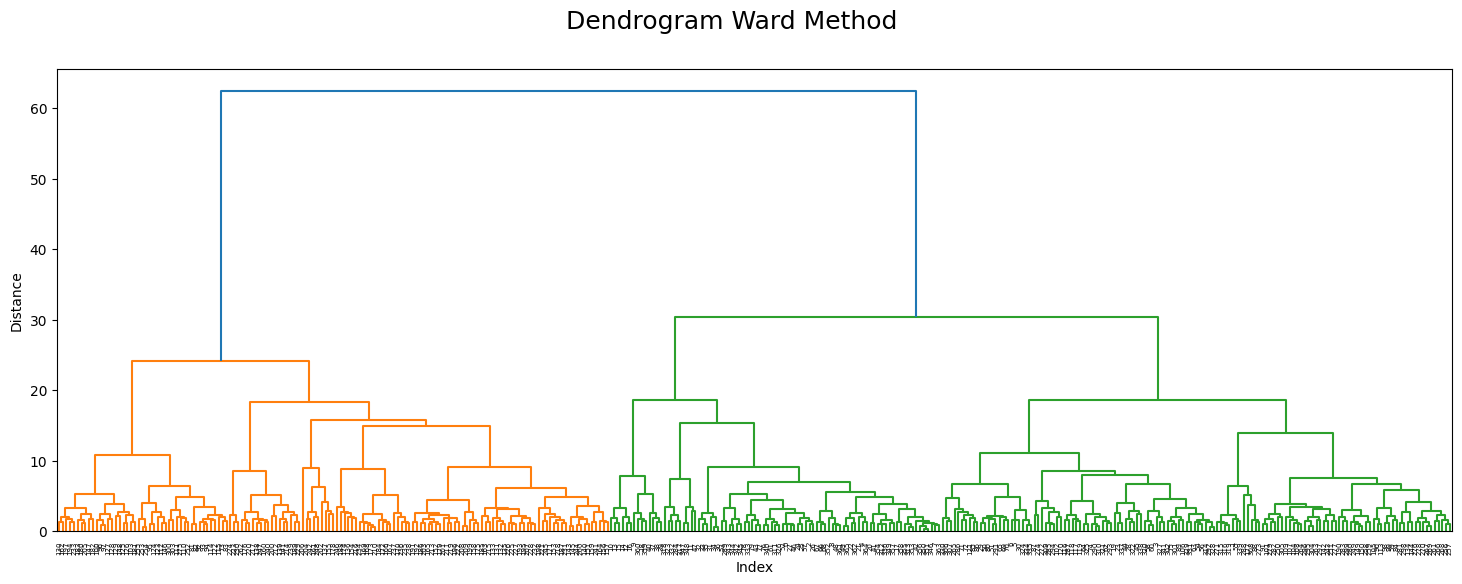

In [21]:
#Comparing only Basel and Budapest 1960 - average method

distance_ward = linkage(sixties_scaled.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',]],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

# 3.2 All Stations - 1960 <a id='all'></a>

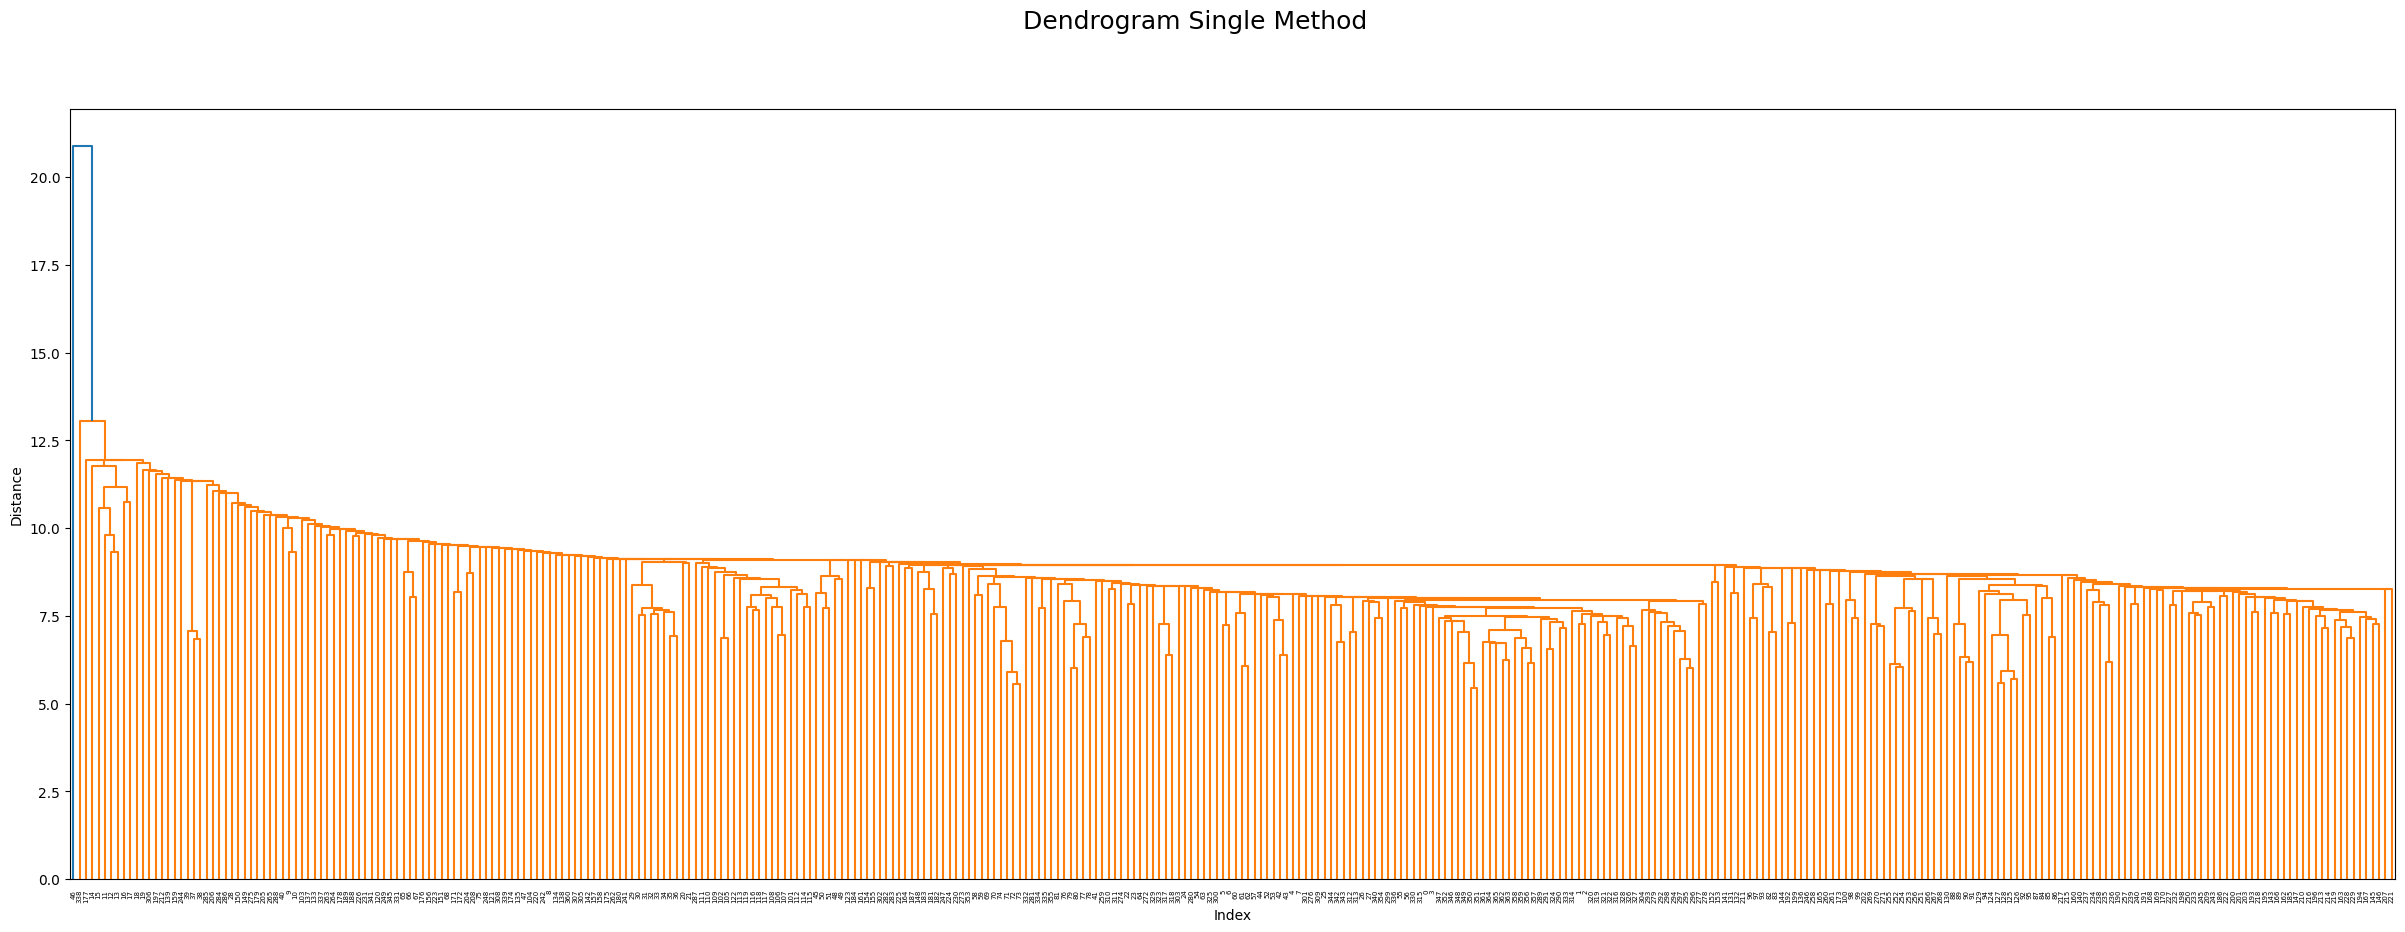

In [22]:
#Comparing all stations 1960 - single method

distance_single = linkage(sixties_scaled.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="single")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()


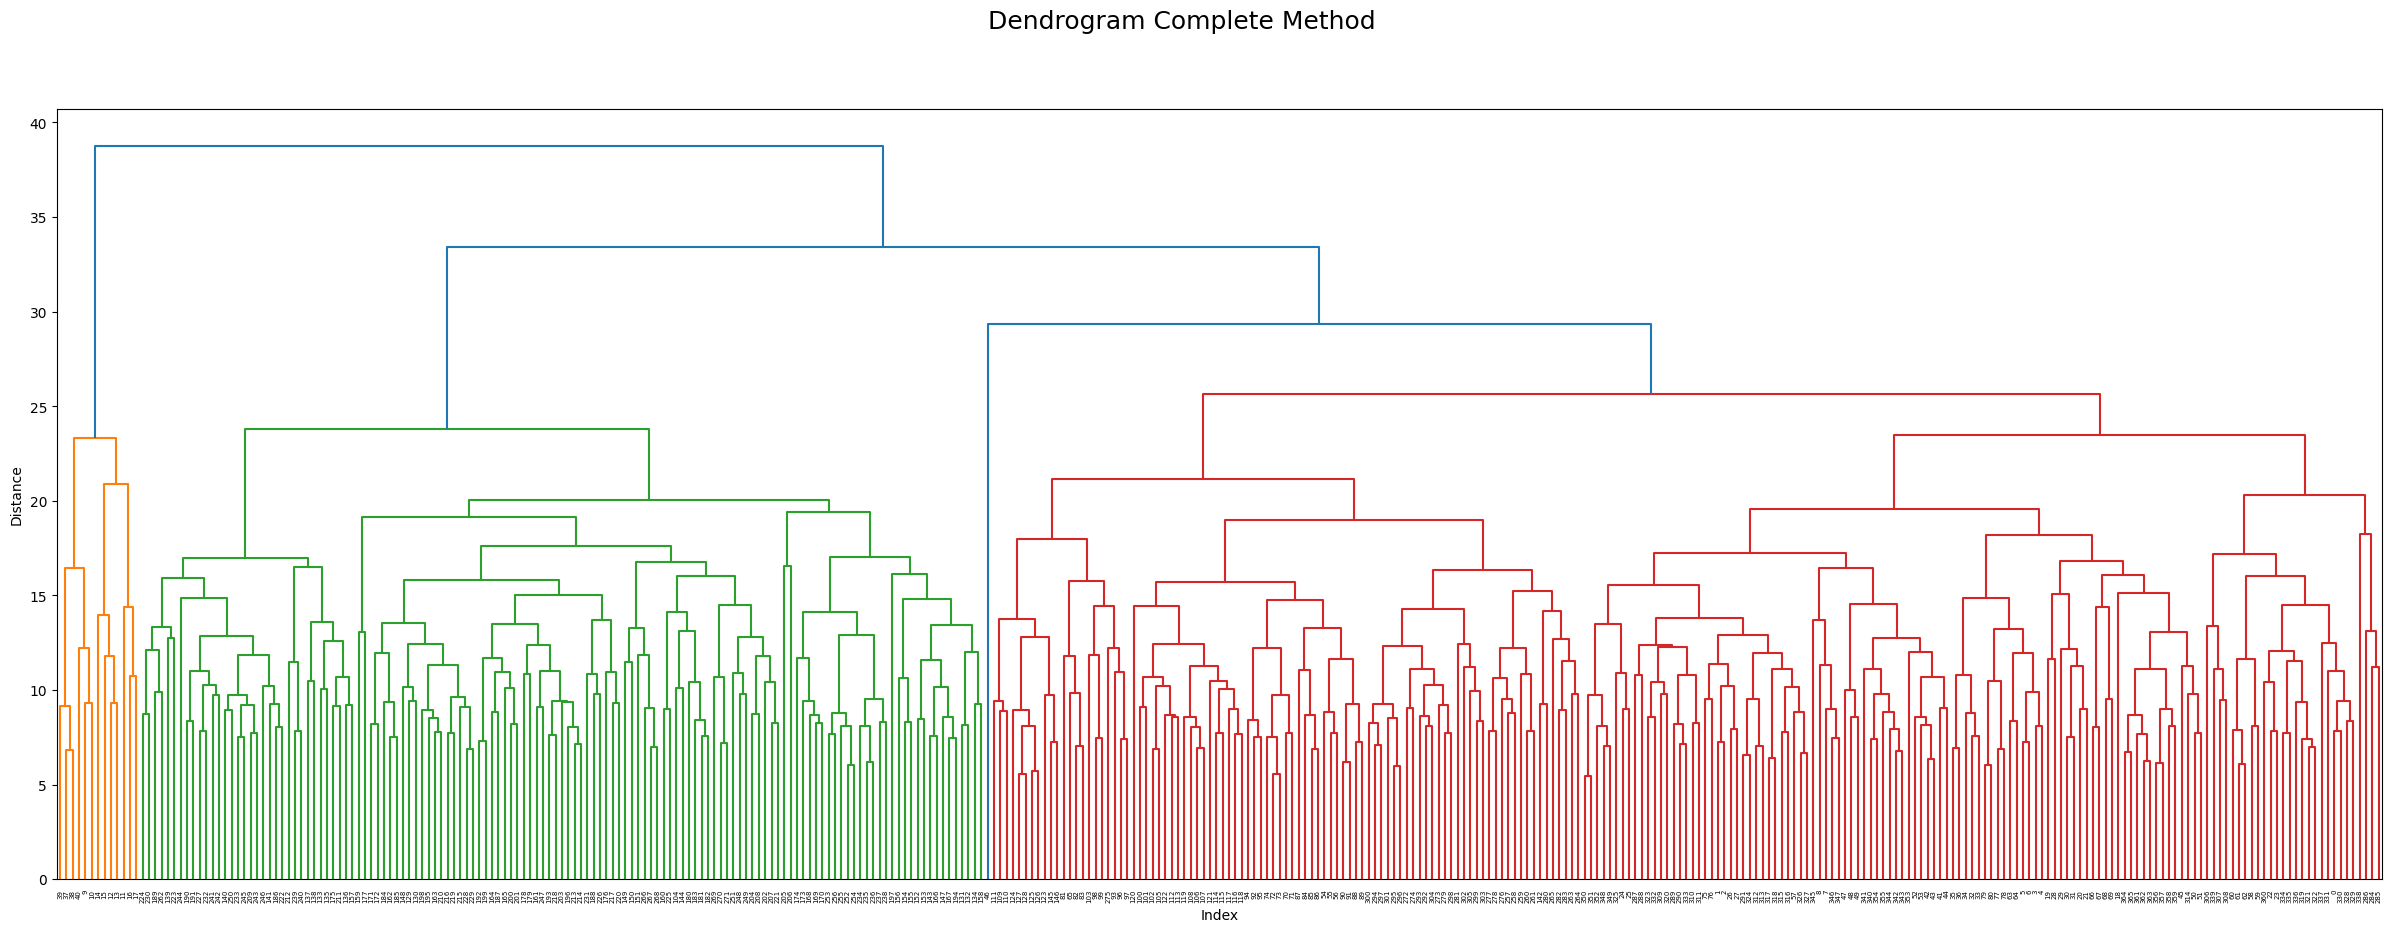

In [23]:
#Comparing all stations 1960 - complete method

distance_complete = linkage(sixties_scaled.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="complete")
plt.figure(figsize=(30,10))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()


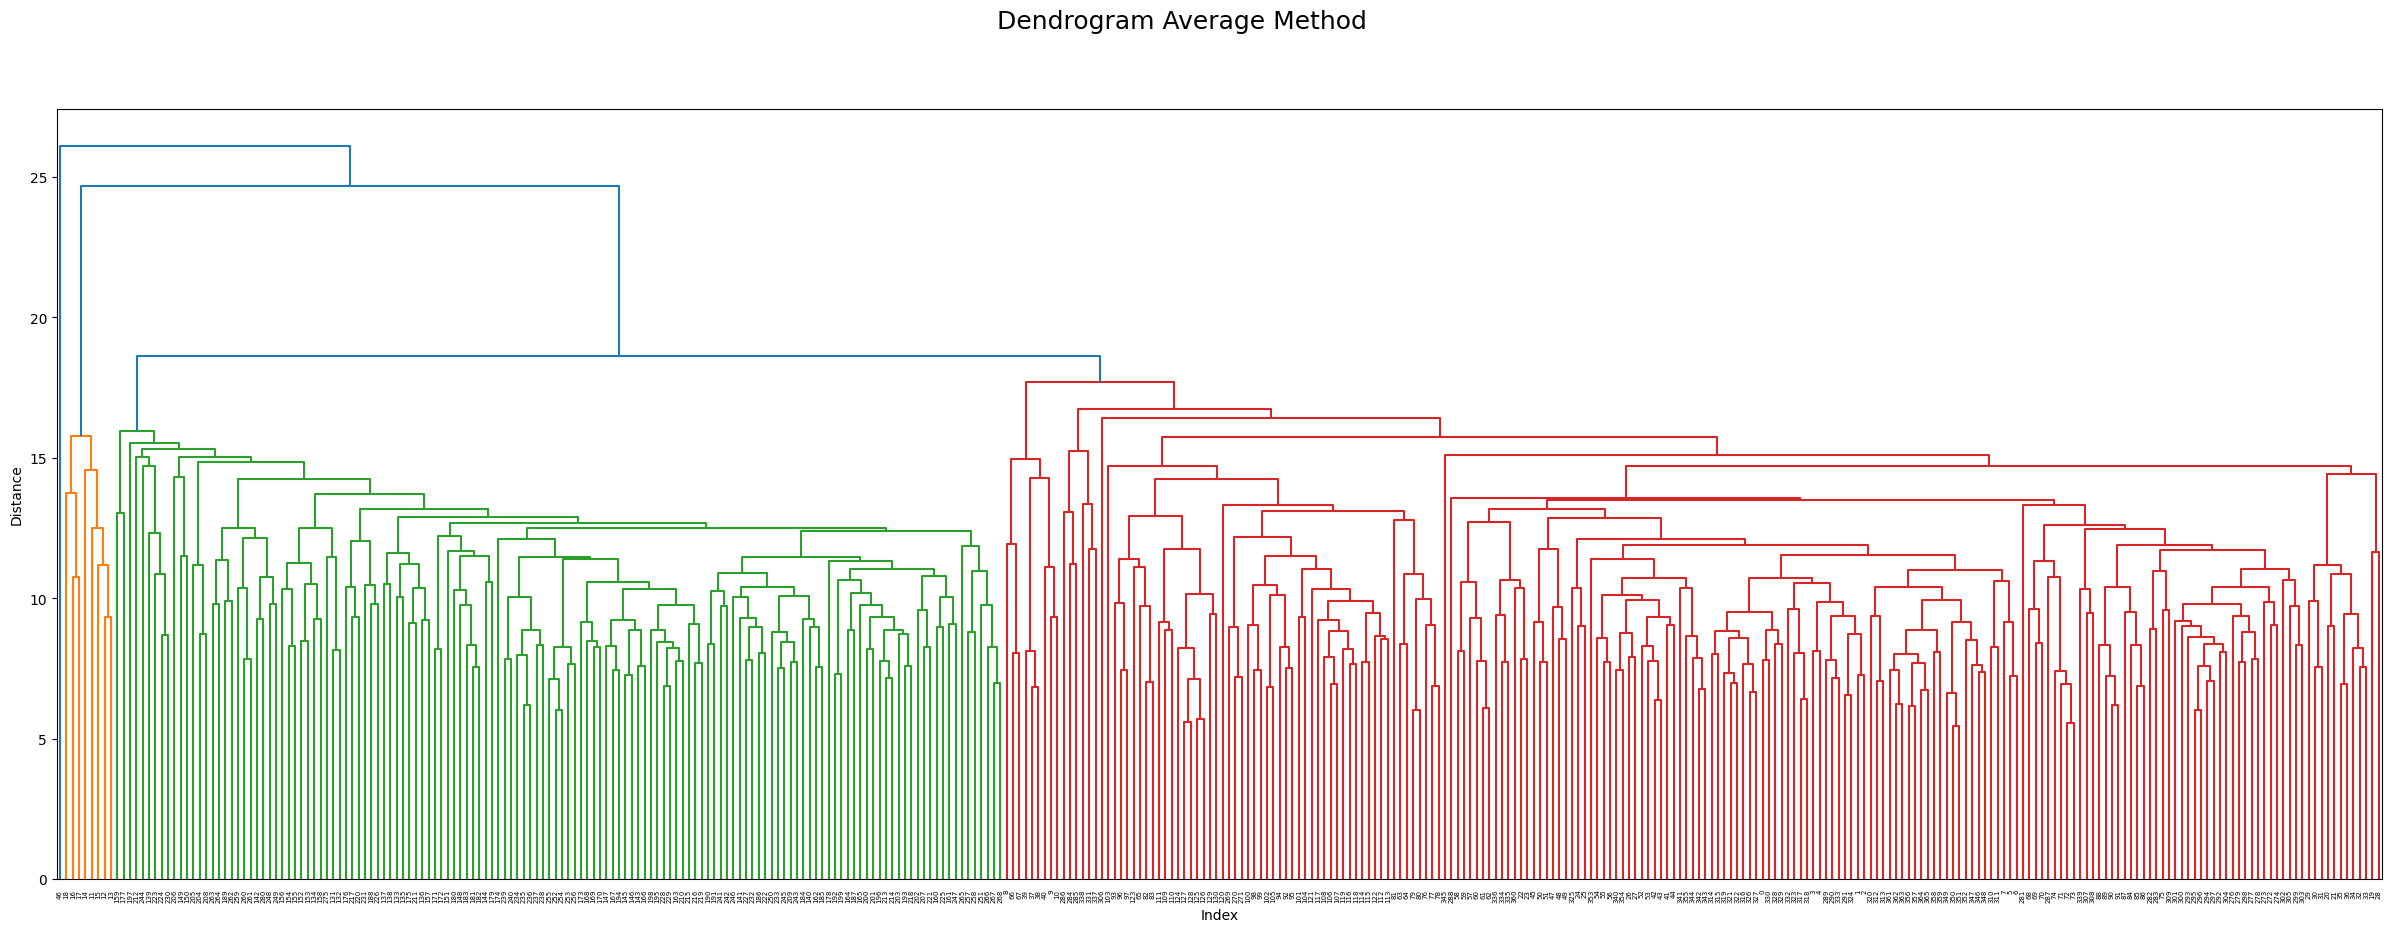

In [24]:
#Comparing all stations 1960 - average method

distance_average = linkage(sixties_scaled.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="average")
plt.figure(figsize=(30,10))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()


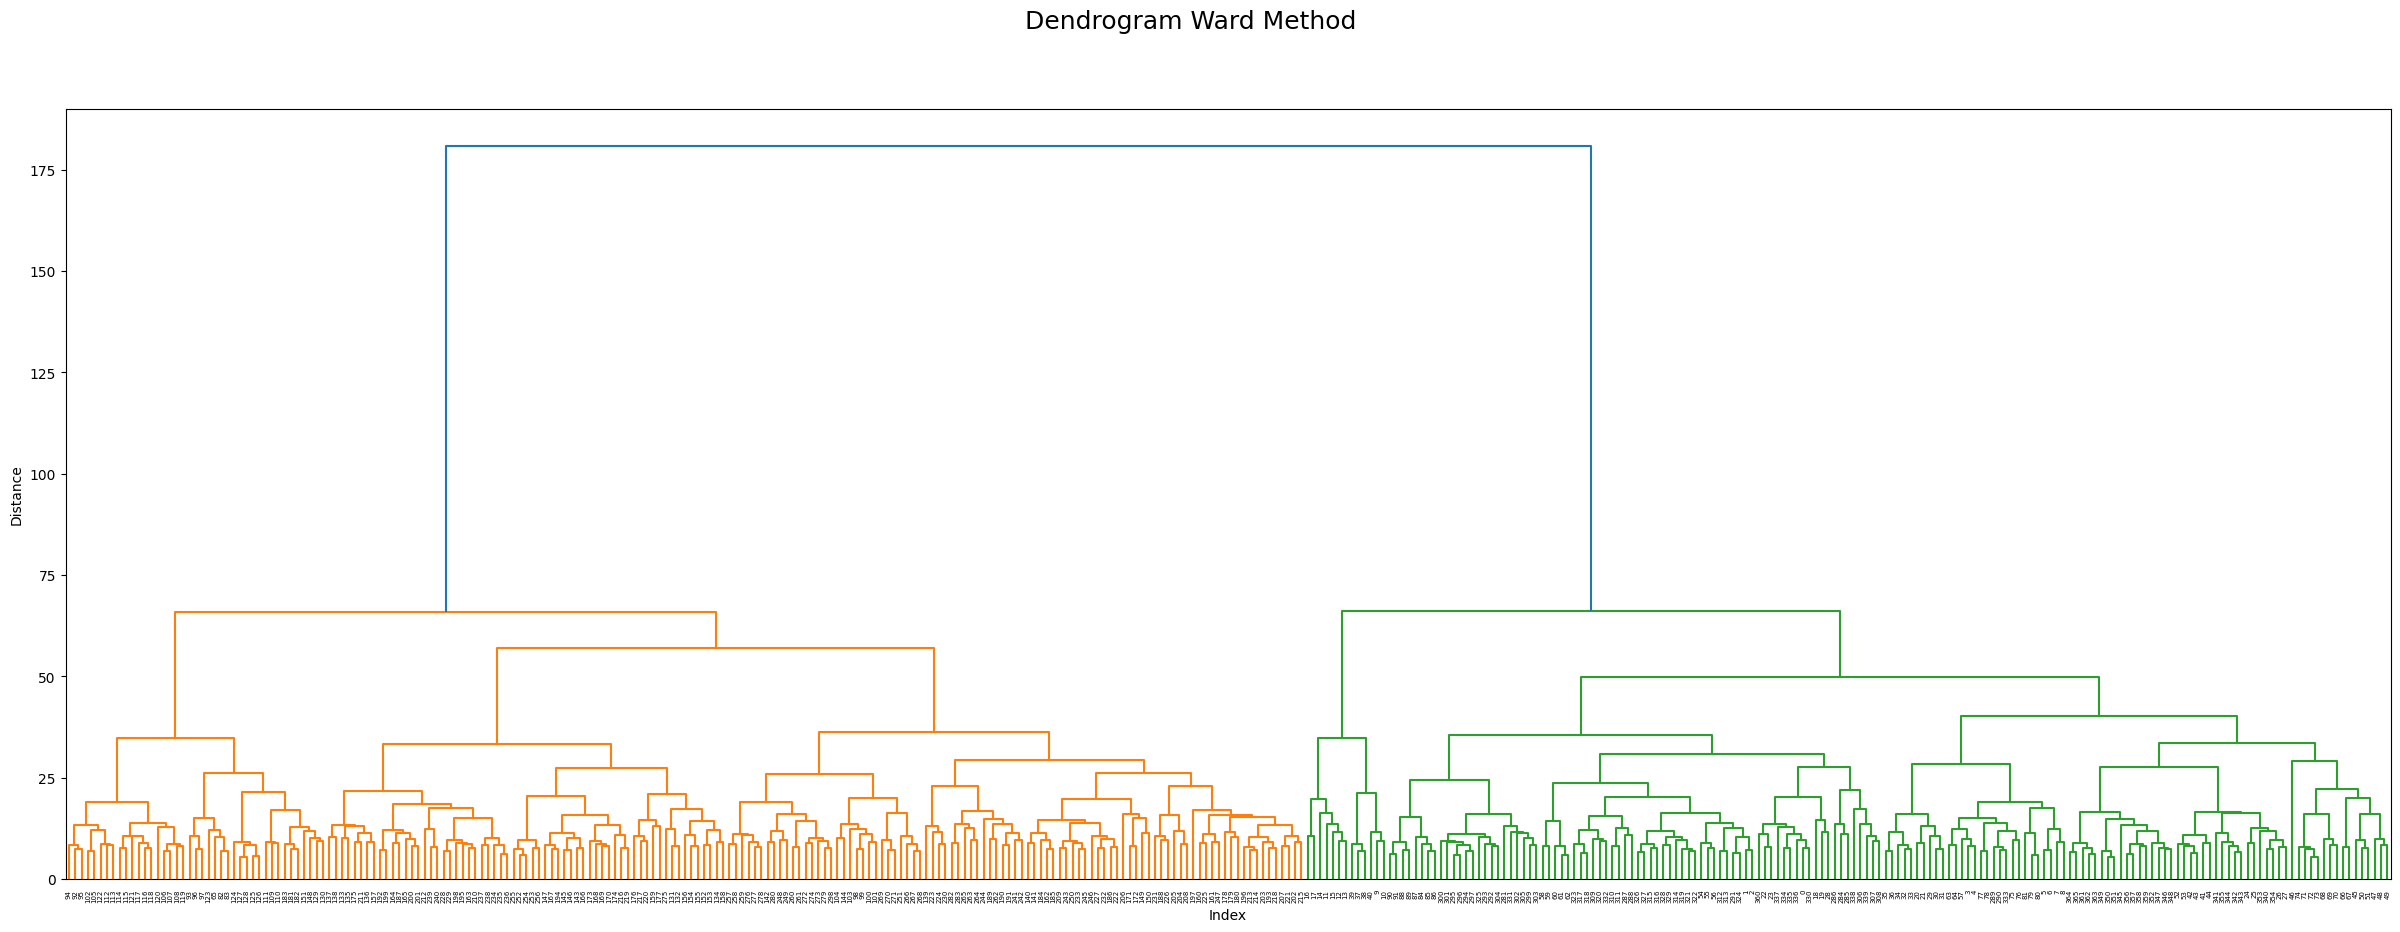

In [25]:
#Comparing all stations 1960 - ward method

distance_ward = linkage(sixties_scaled.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="ward")
plt.figure(figsize=(30,10))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()


# 3.3 Basel VS Budapest VS Heathrow - 1960 <a id='3'></a>

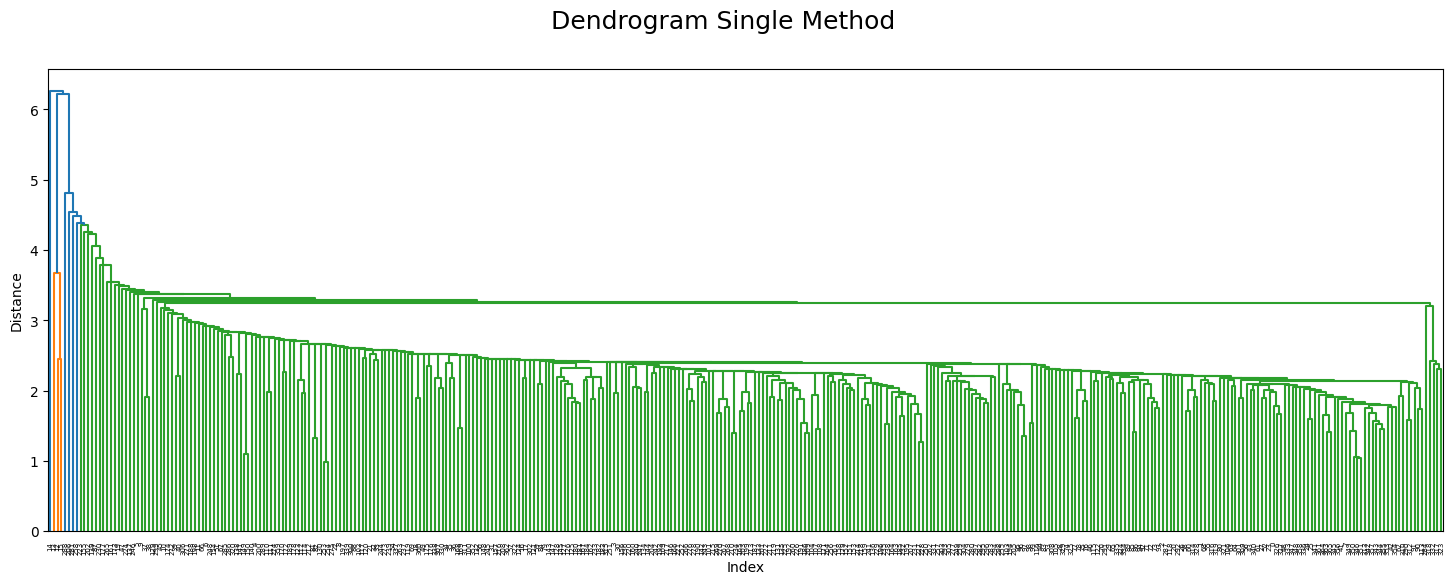

In [26]:
#Comparing only Basel, Budapest and Heathrow 1960 - single method

distance_single = linkage(sixties_scaled.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max', ]],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

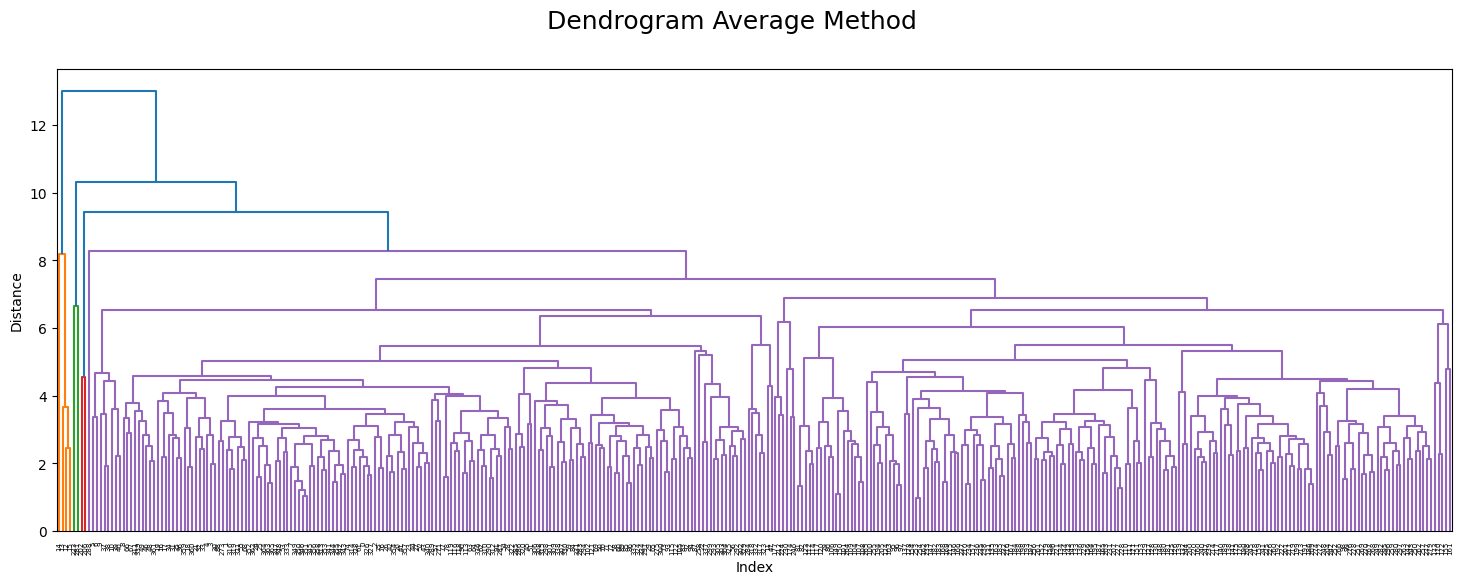

In [27]:
#Comparing only Basel, Budapest and Heathrow 1960 - average method

distance_average = linkage(sixties_scaled.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max', ]],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

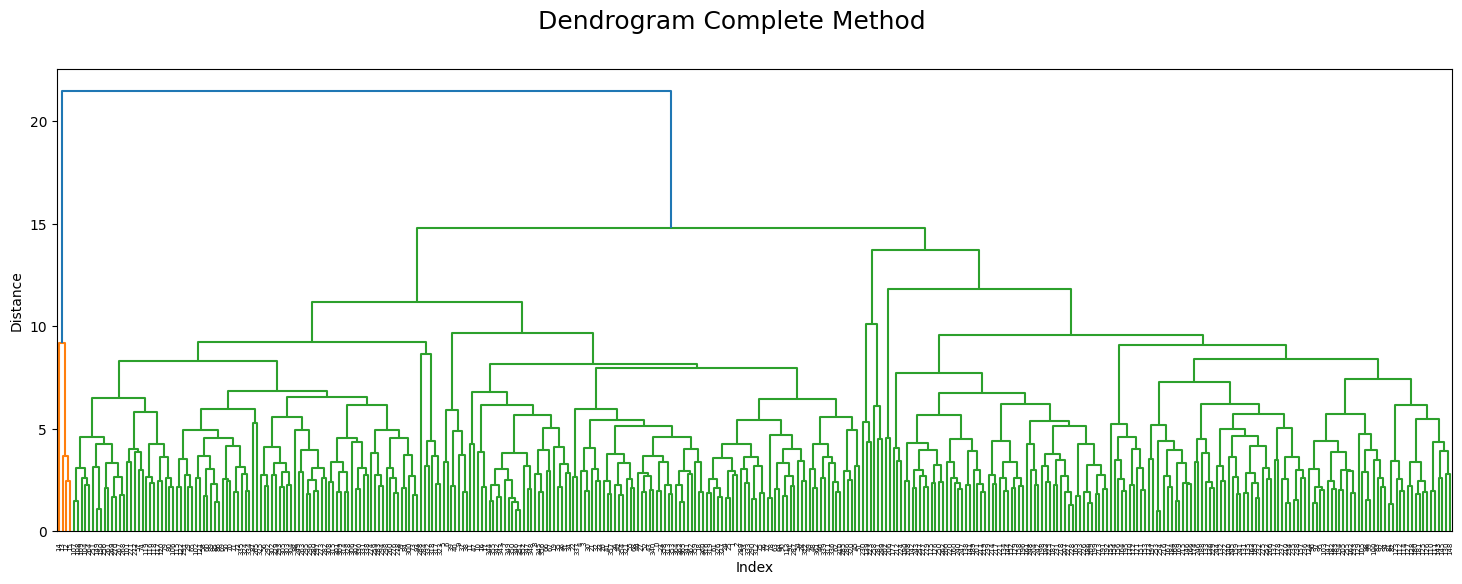

In [28]:
#Comparing only Basel, Budapest and Heathrow 1960 - complete method

distance_complete = linkage(sixties_scaled.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max', ]],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

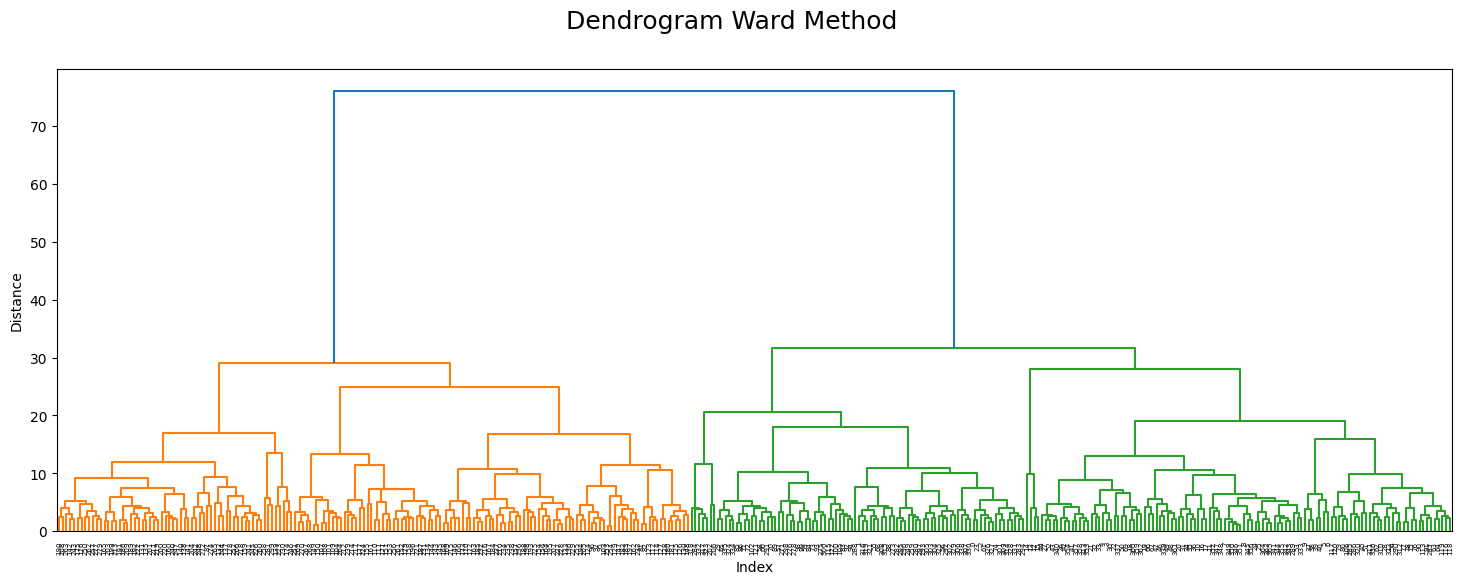

In [29]:
#Comparing only Basel, Budapest and Heathrow 1960 - ward method

distance_ward = linkage(sixties_scaled.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max', ]],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## 4. Principal Components Analysis <a id='principal'></a>

In [30]:
cols = ['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max'
]
df3 = sixties_scaled[cols]
df3

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.570848,-4.440892e-16,0.623770,-2.220446e-16,-1.071460,-0.305217,-0.20878,-0.871676,-0.456164,-0.700870,...,-0.385140,0.788172,-0.848454,-0.864171,-0.183800,-0.052342,0.175924,-0.542397,-0.349356,-0.729979
1,0.133755,-4.440892e-16,0.535928,-2.220446e-16,-1.029711,1.989201,-0.20878,-0.775269,-0.514291,-0.297057,...,0.775034,1.197544,-0.814862,-1.077929,0.565484,-0.052342,-0.851000,-0.435710,-0.444617,-0.408923
2,1.007941,-4.440892e-16,1.062976,-2.220446e-16,-1.217584,0.196687,-0.20878,-1.040387,-0.165528,-0.006311,...,0.775034,1.197544,-0.067437,-1.163432,-0.573427,-0.052342,-1.005039,-0.008963,0.150765,-0.194885
3,-1.177524,-4.440892e-16,1.238659,-2.220446e-16,-0.800088,-0.520319,-0.20878,-0.052220,-0.485227,-0.216294,...,0.775034,0.515257,0.671590,-1.206183,0.775284,-0.052342,-1.030712,-0.835786,-0.039757,-0.810243
4,0.133755,-4.440892e-16,1.502183,-2.220446e-16,-0.727026,-0.185716,-0.20878,0.261101,-0.964777,-0.943158,...,-1.545314,-0.303487,1.880907,-0.853483,-0.693313,-0.052342,0.432655,-1.289205,-1.063815,-1.398846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1.007941,-4.440892e-16,1.765707,-2.220446e-16,-1.217584,0.794192,-0.20878,-1.040387,-1.269945,-0.991615,...,0.194947,-0.712859,-0.932434,-1.024489,2.438694,-0.052342,-0.568596,-1.395891,-1.087630,-1.586129
362,-0.740431,-4.440892e-16,1.326501,-2.220446e-16,-0.977524,-0.520319,-0.20878,-0.606558,-1.269945,-1.023921,...,0.194947,-1.258689,-1.259957,-1.142056,0.205828,-0.052342,-0.953692,-1.289205,-1.182892,-1.265073
363,0.570848,-4.440892e-16,0.975135,-2.220446e-16,-1.019273,-0.496419,-0.20878,-0.727066,-1.182754,-1.040073,...,0.194947,0.515257,-0.504134,-1.216871,1.209868,-0.052342,-1.030712,-0.835786,-1.016184,-0.542696
364,0.133755,-4.440892e-16,0.623770,-2.220446e-16,-0.758338,-0.376918,-0.20878,0.236999,-1.546049,-1.330819,...,0.194947,-0.712859,-0.655299,-0.981738,1.015055,-0.052342,-0.440230,-1.049159,-0.635140,-1.265073


In [31]:
#Run the PCA model, reducing to 11 (for number of measurements)
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(df3)

In [32]:
principalComponents

array([[ -6.07292938,  -3.65697834,  -4.05173405, ...,  -0.21815959,
          0.8063921 ,   0.20582535],
       [ -6.31418416,  -4.11186536,  -1.4716552 , ...,  -0.2395373 ,
         -0.60443958,   0.59682004],
       [ -6.46103415,  -2.92928661,   1.29671662, ...,  -0.74244621,
          0.44486114,   1.4756094 ],
       ...,
       [-10.71515867,   0.43232104,   1.93621725, ...,   0.32120565,
         -0.98376273,  -0.2164467 ],
       [-10.2172512 ,   0.38345329,  -1.25622737, ...,   0.22282048,
         -0.69496965,   0.28372756],
       [-10.61573732,  -1.15500187,   0.2444177 , ...,  -1.85647819,
         -0.42674761,  -0.77279017]])

In [33]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11'])

In [34]:
dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-6.072929,-3.656978,-4.051734,0.268216,2.260446,1.227873,-1.253845,-0.340780,-0.218160,0.806392,0.205825
1,-6.314184,-4.111865,-1.471655,1.019489,1.045429,-0.882476,1.025083,1.395447,-0.239537,-0.604440,0.596820
2,-6.461034,-2.929287,1.296717,2.485433,2.283191,-3.121731,-0.221677,0.635139,-0.742446,0.444861,1.475609
3,-6.802182,-0.300924,-0.610541,5.404934,3.301393,-2.232254,0.569949,0.297159,-1.001893,1.912447,1.198613
4,-6.552117,-0.088310,-1.302248,5.067130,1.897830,1.480664,-0.278492,-1.293890,-2.329405,1.160907,1.191022
...,...,...,...,...,...,...,...,...,...,...,...
361,-9.674900,-0.383605,-0.030491,-1.081026,1.841194,0.932801,-1.303341,-2.917098,-0.536818,-1.894642,-1.589295
362,-10.668307,0.411352,1.126592,-2.624260,2.737020,0.255406,1.253777,-2.781472,0.937382,-0.433622,0.087503
363,-10.715159,0.432321,1.936217,-0.327551,2.430391,-0.515355,0.728684,-1.676905,0.321206,-0.983763,-0.216447
364,-10.217251,0.383453,-1.256227,1.958406,1.489602,1.817999,0.657085,-0.634215,0.222820,-0.694970,0.283728


##5. Exporting PCA'd dataset to csv file <a id='save'></a>

In [35]:
dfPCA.to_csv(os.path.join(path, '012 Data', 'Prepared_Data' '1960_PCA.csv'))